In [1]:
import sys
sys.path.append('../')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ml2rules.machinelearning import *
from ml2rules.rules import *

%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('../data/sample.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
print(f'Shape of the dataframe: {df.shape}')

target = 'Stability'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of the dataframe: (372, 1411)


In [5]:
xgb = XGBModel(X_train=X, y_train=y, X_test=None, y_test=None)
xgb.train(n_iter=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 2/3; 1/100] START booster=gbtree, colsample_bytree=0.7222222222222222, gamma=0.3593813663804626, learning_rate=1.0, max_depth=5, min_child_weight=9, n_estimators=185, random_state=42, subsample=0.9444444444444444
[CV 2/3; 2/100] START booster=gbtree, colsample_bytree=0.6666666666666666, gamma=0.01, learning_rate=0.004641588833612777, max_depth=16, min_child_weight=6, n_estimators=95, random_state=42, subsample=0.6111111111111112
[CV 3/3; 2/100] START booster=gbtree, colsample_bytree=0.6666666666666666, gamma=0.01, learning_rate=0.004641588833612777, max_depth=16, min_child_weight=6, n_estimators=95, random_state=42, subsample=0.6111111111111112
[CV 1/3; 2/100] START booster=gbtree, colsample_bytree=0.6666666666666666, gamma=0.01, learning_rate=0.004641588833612777, max_depth=16, min_child_weight=6, n_estimators=95, random_state=42, subsample=0.6111111111111112
[CV 3/3; 1/100] START booster=gbtree, colsample_bytree=0.722

KeyboardInterrupt: 

[14:44:08] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


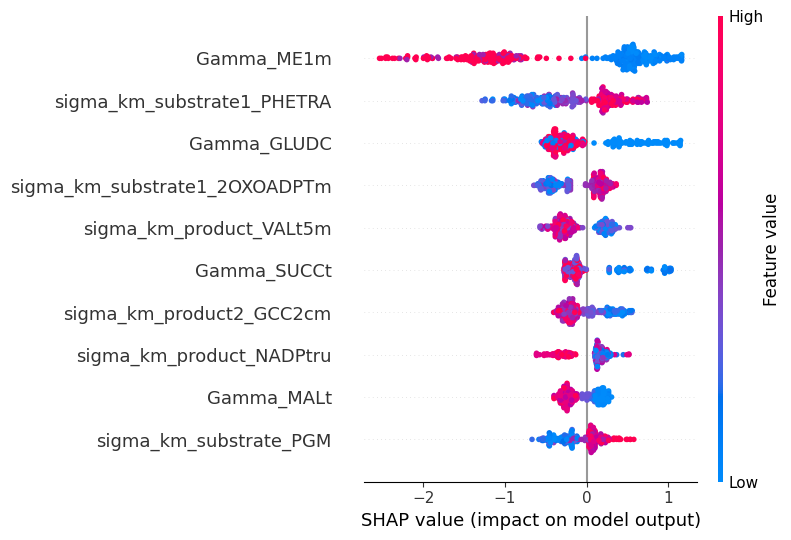

In [20]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pd.DataFrame(X, columns=df.columns[:-1]))
shap.summary_plot(shap_values, pd.DataFrame(X, columns=df.columns[:-1]), plot_type="dot", max_display=10)

In [6]:
model = XGBClassifier(random_state=SEED).fit(X_train, y_train)
y_hat = model.predict(X_train)
tree_surr = train_tree_classifier(X_train, y_train)

In [13]:
c = MyClass(tree_clf=tree_surr, df=df, target='Stability')
c.get_rules()
c.clean_rules()
idxs = c.rule_to_python(X_test, 2)
print(y_test.loc[idxs].shape)
y_test.loc[idxs].value_counts(normalize=True)

(14,)


1    0.642857
0    0.357143
Name: Stability, dtype: float64

In [14]:
c.rules

['if (Gamma_3C3HMPtm > 7.52) and (Gamma_CBPt <= 3.888) and (sigma_km_product12_LMPD_s_0450_c_1_256 <= 0.899) then class: 0 (proba: 90.37%) | based on 187 samples',
 'if (Gamma_3C3HMPtm <= 7.52) and (Gamma_G6PDH2r > 0.89) then class: 0 (proba: 100.0%) | based on 30 samples',
 'if (Gamma_3C3HMPtm > 7.52) and (Gamma_CBPt > 3.888) and (sigma_km_substrate6_LMPD_s_0450_c_1_256 > 0.205) then class: 1 (proba: 75.86%) | based on 29 samples',
 'if (Gamma_3C3HMPtm > 7.52) and (Gamma_CBPt <= 3.888) and (sigma_km_product12_LMPD_s_0450_c_1_256 > 0.899) then class: 0 (proba: 76.92%) | based on 26 samples',
 'if (Gamma_3C3HMPtm > 7.52) and (Gamma_CBPt > 3.888) and (sigma_km_substrate6_LMPD_s_0450_c_1_256 <= 0.205) then class: 0 (proba: 75.0%) | based on 24 samples',
 'if (Gamma_3C3HMPtm <= 7.52) and (Gamma_G6PDH2r <= 0.89) then class: 1 (proba: 100.0%) | based on 1 samples']

### Experimentation area

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
X = pd.read_csv('../data/rekindle_data.csv')
y = pd.read_csv('../data/rekindle_stabilities.csv')
df = pd.concat([X, y], axis=1)
df['Stability'] = df['Stability'].replace(-1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2000, random_state=SEED, stratify=y)

df = pd.concat([X_train, y_train], axis=1)
df['Stability'] = df['Stability'].replace(-1, 0)
X = df.drop('Stability', axis=1)
y = df['Stability']

X_train, X_test, y_train, y_test = data_preprocessing(df, 'Stability')

class_names = y_train['Stability'].unique().astype(str)
feature_names = X_train.columns.values

In [30]:
model = XGBClassifier(random_state=SEED).fit(X_train, y_train)

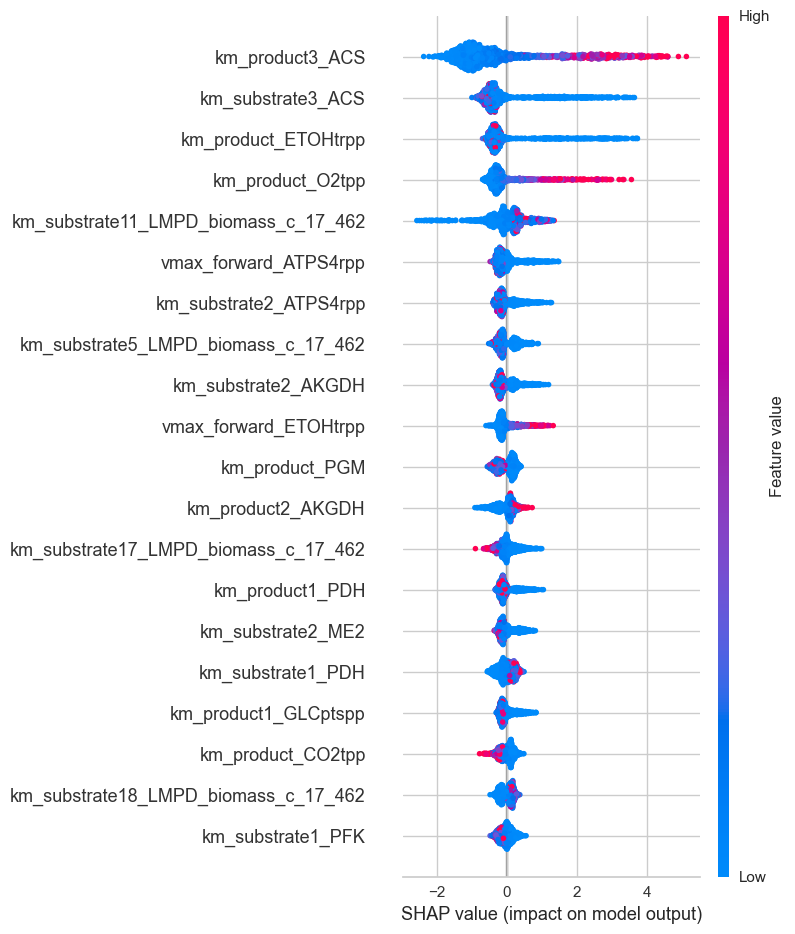

In [32]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='dot', 
                  class_names=class_names, feature_names=feature_names, show=True)